In [48]:
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
from scipy.stats import sem

# Hyperparameter profiling

In [49]:
# profiling figure for B
B_list = [50, 100, 200, 400]
k_list = [10]
B12_list = [[5, 200], [10, 200], [20, 50], [20, 100], [20, 200], [40, 200], [20, 400]]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_B.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

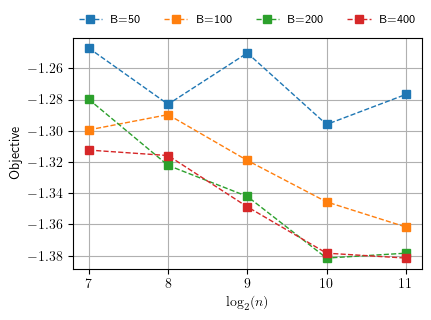

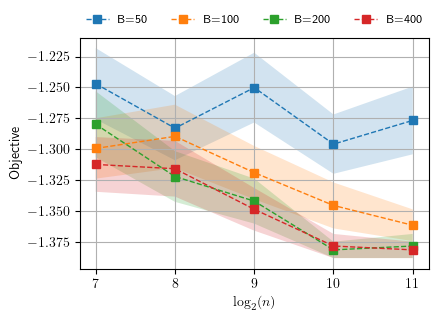

In [50]:
# algorithm 1, choose B
_, ax = plt.subplots(figsize = (4.5, 3))
# ax.plot(np.log2(sample_number), SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')

for ind, B in enumerate(B_list):
    curve = [-item for item in bagging_alg1_obj_avg[ind][0][:-1]]
    ax.plot(np.log2(sample_number[:-1]), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B={B}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg1_B.png", bbox_inches = "tight")
plt.show()


# with confidence interval
fig, ax = plt.subplots(figsize=(4.5, 3))
for ind, B in enumerate(B_list):
    # Calculate means and standard errors for each sample count
    means = [-np.mean(item) for item in bagging_alg1_obj_list[ind][0][:-1]]
    std_errors = [sem(item) for item in bagging_alg1_obj_list[ind][0][:-1]]
    confidence_intervals = [1 * se for se in std_errors]  # 95% CI
    
    sample_numbers_log = np.log2(sample_number[:-1])
    
    # Plot the mean curve
    ax.plot(sample_numbers_log, means, marker='s', linestyle='--', linewidth=1, label=f"B={B}")
    
    # Add fill_between for the confidence interval
    ax.fill_between(sample_numbers_log, 
                    [m - ci for m, ci in zip(means, confidence_intervals)],
                    [m + ci for m, ci in zip(means, confidence_intervals)],
                     alpha=0.2)

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg1_B_CI.png", bbox_inches = "tight")
plt.show()

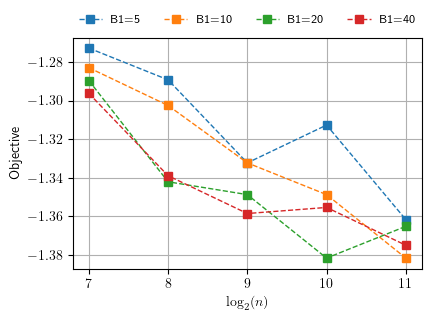

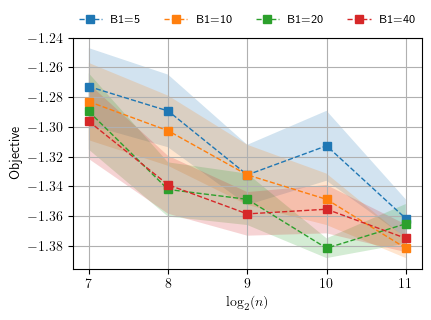

In [51]:
# algorithm 3, choose B1
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    curve = [-item for item in bagging_alg3_obj_avg[ind][0][:-1]]
    ax.plot(np.log2(sample_number[:-1]), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B1={B12[0]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B1.png", bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(figsize=(4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    curve = [-np.mean(item) for item in bagging_alg3_obj_list[ind][0][:-1]]
    std_errors = [sem(item) for item in bagging_alg3_obj_list[ind][0][:-1]]  # Calculate standard errors
    confidence_intervals = [1 * se for se in std_errors]  # 95% CI using 1.96 multiplier

    sample_numbers_log = np.log2(sample_number[:-1])
    
    # Plot the mean curve
    ax.plot(sample_numbers_log, curve, marker='s', linestyle='--', linewidth=1, label=f"B1={B12[0]}")
    
    # Add fill_between for the confidence interval
    ax.fill_between(sample_numbers_log, 
                    [m - ci for m, ci in zip(curve, confidence_intervals)],
                    [m + ci for m, ci in zip(curve, confidence_intervals)],
                    alpha=0.2)  # Light shading for the confidence interval

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B1_CI.png", bbox_inches = "tight")
plt.show()

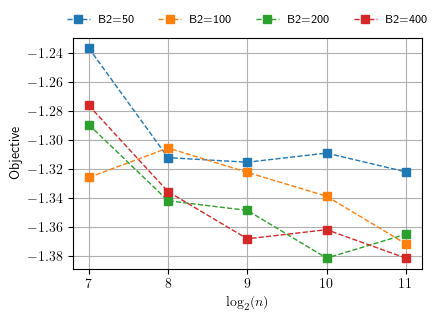

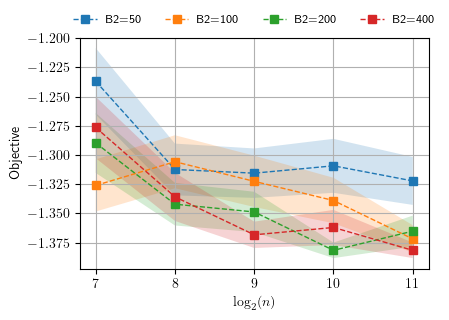

In [52]:
# algorithm 3, choose B2
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    curve = [-item for item in bagging_alg3_obj_avg[ind][0][:-1]]
    ax.plot(np.log2(sample_number[:-1]), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B2={B12[1]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B2.png", bbox_inches = "tight")
plt.show()



fig, ax = plt.subplots(figsize=(4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    # Compute the mean and standard error for the curve
    curve = [-np.mean(item) for item in bagging_alg3_obj_list[ind][0][:-1]]
    std_errors = [sem(item) for item in bagging_alg3_obj_list[ind][0][:-1]]
    confidence_intervals = [1 * se for se in std_errors]  # 95% CI assuming normal distribution

    sample_numbers_log = np.log2(sample_number[:-1])

    # Plot the mean curve
    ax.plot(sample_numbers_log, curve, marker='s', linestyle='--', linewidth=1, label=f"B2={B12[1]}")
    
    # Add fill_between for the confidence interval
    ax.fill_between(sample_numbers_log, 
                    [m - ci for m, ci in zip(curve, confidence_intervals)],
                    [m + ci for m, ci in zip(curve, confidence_intervals)],
                     alpha=0.2)  # Adjust color and alpha for visibility

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B2_CI.png", bbox_inches = "tight")
plt.show()

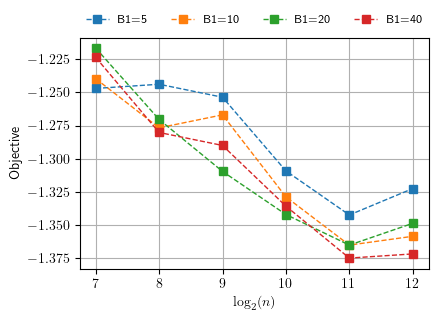

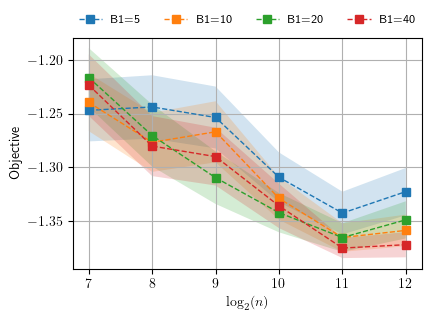

In [53]:
# algorithm 4, choose B1
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    curve = [-item for item in bagging_alg4_obj_avg[ind][0]]
    ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B1={B12[0]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B1.png", bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(figsize=(4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    # Extract the values for the current configuration
    values = bagging_alg4_obj_list[ind][0]
    # Calculate means and standard errors for each sample count
    curve = [-np.mean(item) for item in values]
    std_errors = [sem(item) if len(item) > 1 else 0 for item in values]  # Handle cases with single data point
    confidence_intervals = [1 * se for se in std_errors]  # 95% CI

    sample_numbers_log = np.log2(sample_number)

    # Plot the mean curve
    ax.plot(sample_numbers_log, curve, marker='s', linestyle='--', linewidth=1, label=f"B1={B12[0]}")
    
    # Add fill_between for the confidence interval
    ax.fill_between(sample_numbers_log, 
                    [m - ci for m, ci in zip(curve, confidence_intervals)],
                    [m + ci for m, ci in zip(curve, confidence_intervals)],
                     alpha=0.2)  # Subtle shading for the confidence interval

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B1_CI.png", bbox_inches = "tight")
plt.show()

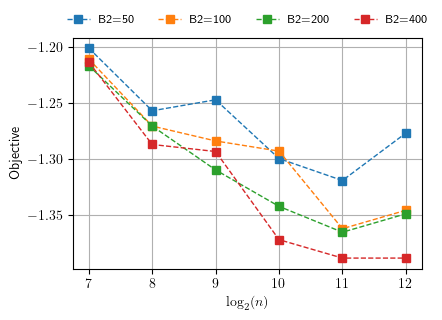

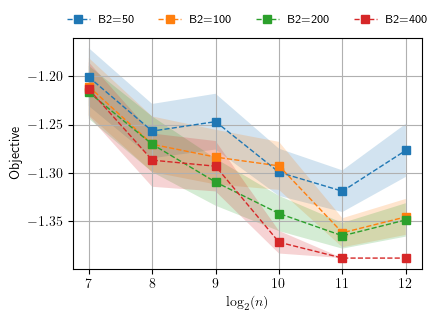

In [54]:
# algorithm 4, choose B2
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    curve = [-item for item in bagging_alg4_obj_avg[ind][0]]
    ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B2={B12[1]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B2.png", bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(figsize=(4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    values = bagging_alg4_obj_list[ind][0]
    curve = [-np.mean(item) for item in values]
    std_errors = [sem(item) if len(item) > 1 else 0 for item in values]  # Calculate standard errors
    confidence_intervals = [1 * se for se in std_errors]  # 95% CI

    sample_numbers_log = np.log2(sample_number)

    # Plot the mean curve
    ax.plot(sample_numbers_log, curve, marker='s', linestyle='--', linewidth=1, label=f"B2={B12[1]}")
    
    # Add fill_between for the confidence interval
    ax.fill_between(sample_numbers_log, 
                    [m - ci for m, ci in zip(curve, confidence_intervals)],
                    [m + ci for m, ci in zip(curve, confidence_intervals)],
                    alpha=0.2)  # Subtle shading for the confidence interval

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B2_CI.png", bbox_inches = "tight")
plt.show()

In [58]:
# profiling figure for k (two examples)
B_list = [200]
k_list = [0.05, 0.1, 0.2, 0.4, 2, 10, 20, 50] # figures 1 and 2
# k_list = [0.05, 0.1, 0.4, 2, 10, 50] # figure 3
# B12_list = [(20,200)]
sample_number = [128, 256, 512, 1024, 2048, 4096]

# with open("./profiling/obj_lists_k_1.json", "r") as f:
with open("./profiling/obj_lists_k_2.json", "r") as f:
# with open("./profiling/obj_lists_k_3.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

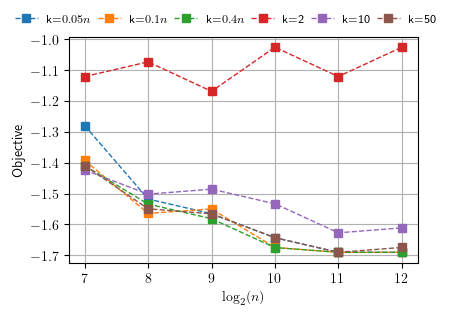

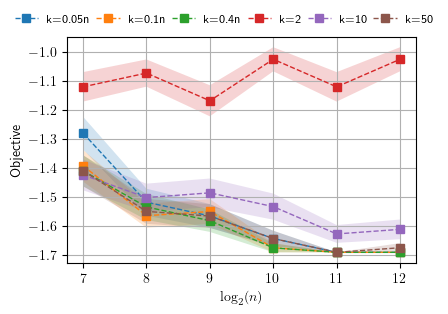

In [60]:
# algorithm 1, choose k parameter1
# _, ax = plt.subplots(figsize = (4.5, 3)) # figures 1 and 3
_, ax = plt.subplots(figsize = (4.5, 2.93)) # figure 2

for ind, k in enumerate(k_list):
    if k not in [0.2, 20]:
        label_name = f"k={k}" if k > 1 else f"k=${k}n$"
        curve = [-item for item in bagging_alg1_obj_avg[0][ind]]
        ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, 
            label=label_name)

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.45, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True)
# plt.savefig("./profiling/profiling_alg1_k_1.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg1_k_2.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg1_k_3.png", bbox_inches = "tight")
plt.show()

# ax.plot(np.log2(sample_number), SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')



# fig, ax = plt.subplots(figsize = (4.5, 3)) # figures 1 and 3
fig, ax = plt.subplots(figsize = (4.5, 2.93)) # figure 2

for ind, k in enumerate(k_list):
    if k not in [0.2, 20]:  # Filter out specific k values as you originally specified
        label_name = f"k={k}" if k > 1 else f"k={k}n"  # Adjusted for LaTeX-like formatting if necessary

        # Assuming bagging_alg1_obj_list is organized by [0][ind] where ind cycles through k_list indices
        values = bagging_alg1_obj_list[0][ind]
        curve = [-np.mean(item) for item in values]
        std_errors = [sem(item) for item in values]  # Calculate standard errors
        confidence_intervals = [1 * se for se in std_errors]  # 95% CI

        sample_numbers_log = np.log2(sample_number)

        # Plot the mean curve
        ax.plot(sample_numbers_log, curve, marker='s', linestyle='--', linewidth=1, label=label_name)
        
        # Add fill_between for the confidence interval
        ax.fill_between(sample_numbers_log, 
                        [m - ci for m, ci in zip(curve, confidence_intervals)],
                        [m + ci for m, ci in zip(curve, confidence_intervals)],
                         alpha=0.2)  # Light shading for the confidence interval

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.45, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True)
# plt.savefig("./profiling/profiling_alg1_k_1_CI.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg1_k_2_CI.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg1_k_3_CI.png", bbox_inches = "tight")
plt.show()


In [107]:
# epsilon profile (one figure for single solution, one figure for multi solution)


epsilon_list = [0,0.125, 0.5, 2, 8]
sample_number = [2**i for i in range(10, 16)]

# the one with multiple solution
with open("./profiling/obj_lists_epsilon_multiple.json", "r") as f:
    obj_lists = json.load(f)

# the one not with multiple solution
# with open("./profiling/obj_lists_epsilon_single.json", "r") as f:
#     obj_lists = json.load(f)

# with open("./profiling/obj_lists_epsilon_near.json", "r") as f:
#     obj_lists = json.load(f)

print(obj_lists.keys())

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


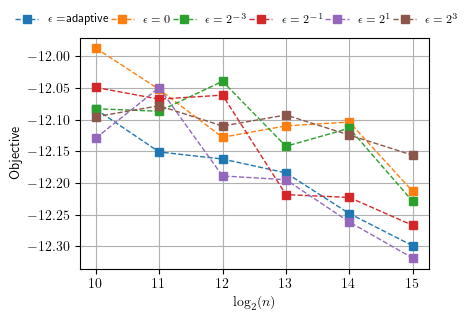

In [103]:
# plotting for Alg3
_, ax = plt.subplots(figsize = (4.5, 3))

curve = [-item for item in bagging_alg3_obj_avg[-1]]
ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, label=f"$\epsilon=$adaptive")

for ind, epsilon in enumerate(epsilon_list):
    if epsilon_list[ind] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[ind]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[ind])}$"
    curve = [-item for item in bagging_alg3_obj_avg[ind]]
    ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, label=label_name)        

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.45, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.2)
ax.grid(True)
# plt.savefig("./profiling/profiling_alg3_epsilon_multiple.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg3_epsilon_single.png", bbox_inches = "tight")
plt.savefig("./profiling/profiling_alg3_epsilon_near.png", bbox_inches = "tight")
plt.show()

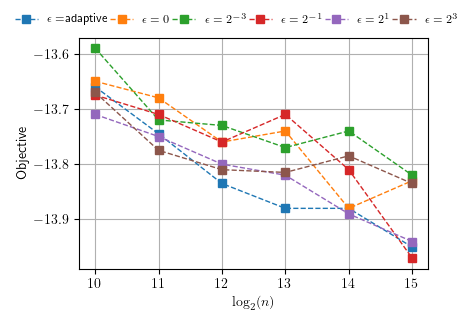

In [108]:
# plotting for Alg4
_, ax = plt.subplots(figsize = (4.5, 3))

curve = [-item for item in bagging_alg4_obj_avg[-1]]
ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, label=f"$\epsilon=$adaptive")

for ind, epsilon in enumerate(epsilon_list):
    if epsilon_list[ind] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[ind]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[ind])}$"
    curve = [-item for item in bagging_alg4_obj_avg[ind]]
    ax.plot(np.log2(sample_number), curve, marker = 's', linestyle = '--', linewidth = 1, label=label_name)        

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.45, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.2)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_epsilon_multiple.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg4_epsilon_single.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg4_epsilon_near.png", bbox_inches = "tight")
plt.show()

# Algorithm comparison with SAA

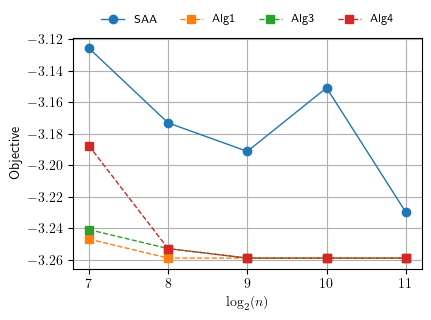

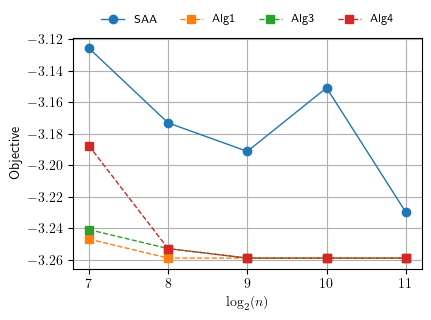

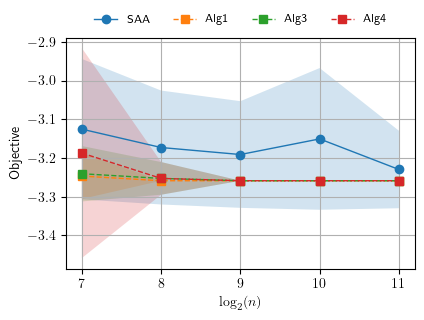

In [65]:
# SSKP figure
with open("./SAA_comparison/obj_lists_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200], k_list = [10], B12_list = [(20,200)]
sample_number = [2**i for i in range(7, 13)]

_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-1], curve_SAA[:-1], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg1[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg3[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg4[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg4')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_SSKP.png", bbox_inches = "tight")
plt.show()



_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-np.mean(item) for item in SAA_obj_list]
ax.plot(np.log2(sample_number)[:-1], curve_SAA[:-1], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-np.mean(item) for item in bagging_alg1_obj_list[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg1[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-np.mean(item) for item in bagging_alg3_obj_list[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg3[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-np.mean(item) for item in bagging_alg4_obj_list[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg4[:-1], marker = 's', linestyle = '--', linewidth = 1, label='Alg4')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)


fig, ax = plt.subplots(figsize=(4.5, 3))

# Helper function to compute means and std deviations
def compute_stats(data):
    means = [-np.mean(item) for item in data]
    std_devs = [np.std(item) for item in data]
    return means, std_devs

# Compute statistics for each algorithm
means_SAA, std_SAA = compute_stats(SAA_obj_list)
means_alg1, std_alg1 = compute_stats(bagging_alg1_obj_list[0][0])
means_alg3, std_alg3 = compute_stats(bagging_alg3_obj_list[0][0])
means_alg4, std_alg4 = compute_stats(bagging_alg4_obj_list[0][0])

# Compute log2 of sample numbers for plotting
sample_log2 = np.log2(sample_number)[:-1]

# Plotting function with confidence intervals
def plot_with_cis(ax, means, stds, sample_log, label, marker, linestyle):
    ax.plot(sample_log, means[:-1], marker=marker, linestyle=linestyle, linewidth=1, label=label)
    ax.fill_between(sample_log, np.array(means[:-1]) - np.array(stds[:-1]), 
                    np.array(means[:-1]) + np.array(stds[:-1]), alpha=0.2)

# Plot data with confidence intervals
plot_with_cis(ax, means_SAA, std_SAA, sample_log2, 'SAA', 'o', '-')
plot_with_cis(ax, means_alg1, std_alg1, sample_log2, 'Alg1', 's', '--')
plot_with_cis(ax, means_alg3, std_alg3, sample_log2, 'Alg3', 's', '--')
plot_with_cis(ax, means_alg4, std_alg4, sample_log2, 'Alg4', 's', '--')

# Set axis labels and legend
ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize='small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)

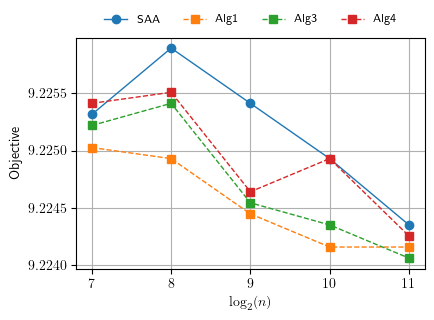

In [111]:
# network figure
with open("./SAA_comparison/obj_lists_network.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200], k_list = [0.1, 10], B12_list = [(20,200)]
sample_number = [2**i for i in range(7, 15)]

_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-3], curve_SAA[:-3], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg1[:-3], marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg3[:-3], marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg4[:-3], marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_network.png", bbox_inches = "tight")
plt.show()

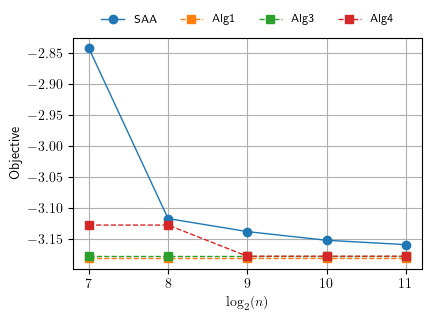

In [112]:
# portfolio figure
with open("./SAA_comparison/obj_lists_portfolio_discrete.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200,400], k_list = [0.1, 2, 10, 50], B12_list = [(20,200), (20,400)]
sample_number = [2**i for i in range(7, 14)]

_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-2], curve_SAA[:-2], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item-0.003 for item in bagging_alg1_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg1[:-2], marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg3[:-2], marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg4[:-2], marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_portfolio_discrete.png", bbox_inches = "tight")
plt.show()

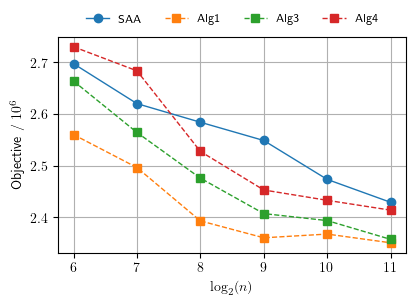

In [113]:
# model selection figure
with open("./SAA_comparison/obj_lists_LASSO.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]


sample_number = [2**i for i in range(5, 12)]
_, ax = plt.subplots(figsize = (4.5, 2.8))

curve_SAA = [item/1e6 for item in SAA_obj_avg[1:]]
ax.plot(np.log2(sample_number)[1:], curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [item/1e6 for item in bagging_alg1_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [item/1e6 for item in bagging_alg3_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [item/1e6 for item in bagging_alg4_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective / $10^{6}$')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_LASSO.png", bbox_inches = "tight")
plt.show()

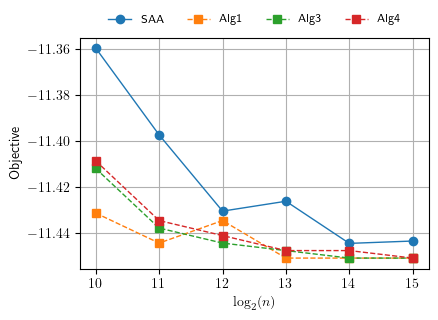

In [136]:
# maximum weight bipartite matching figure
with open("./SAA_comparison/obj_lists_matching.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(10, 16)]
_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_matching.png", bbox_inches = "tight")
plt.show()

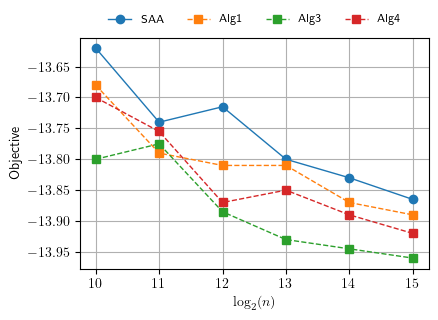

In [114]:
# LP figure
with open("./SAA_comparison/obj_lists_LP.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(10, 16)]
_, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_LP.png", bbox_inches = "tight")
plt.show()

# Algorithm comparison with DRO

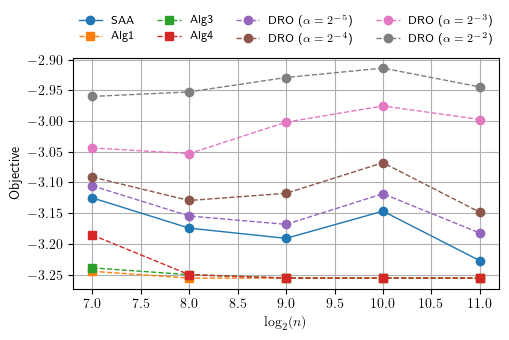

In [62]:
with open ("./DRO_comparison/obj_lists_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
SAA_obj_avg = obj_lists["SAA_obj_avg"][:-1]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"][0][0][:-1]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"][0][0][:-1]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"][0][0][:-1]
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
# print(np.shape(dro_wasserstein_obj_avg))

sample_number = [2**i for i in range(7, 12)]
varepsilon_list = [2**i for i in range(-6,2)]
# use alpha to denote the radius of the ambiguity set

_, ax = plt.subplots(figsize = (5.5, 3))
curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

for ind, alpha in enumerate(varepsilon_list):
    if alpha in [1, 2, 2**-6, 2**-1]:
        continue
    else:
        label_name = f"DRO ($\\alpha=2^{{{int(np.log2(alpha))}}}$)"
    curve_dro = [-item for item in dro_wasserstein_obj_avg[ind][:-1]]
    ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '--', linewidth = 1, label=label_name)    


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol = 4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_comparison_SSKP.png", bbox_inches = "tight")
plt.show()

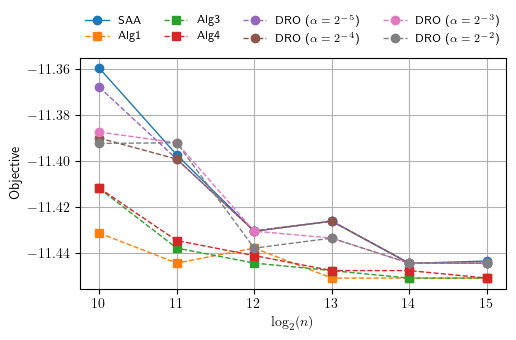

In [42]:
with open ("./DRO_comparison/obj_lists_matching.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"][0][0]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"][0][0]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"][0][0]
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
# print(np.shape(dro_wasserstein_obj_avg))

sample_number = [2**i for i in range(10, 16)]
varepsilon_list = [2**i for i in range(-6,2)]
# use alpha to denote the radius of the ambiguity set

_, ax = plt.subplots(figsize = (5.5, 3))
curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

for ind, alpha in enumerate(varepsilon_list):
    if alpha in [1, 2, 2**-6, 2**-1]:
        continue
    else:
        label_name = f"DRO ($\\alpha=2^{{{int(np.log2(alpha))}}}$)"
    curve_dro = [-item for item in dro_wasserstein_obj_avg[ind]]
    ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '--', linewidth = 1, label=label_name)    


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol = 4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_comparison_matching.png", bbox_inches = "tight")
plt.show()

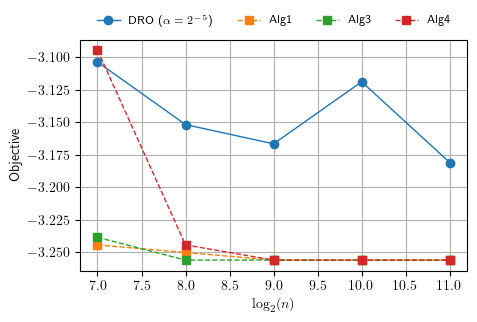

In [62]:
# DRO + bagging in SSKP
with open ("./DRO_comparison/obj_lists_bagging_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
bagging_alg1_DRO_obj_avg = obj_lists["bagging_alg1_DRO_obj_avg"]
bagging_alg3_DRO_obj_avg = obj_lists["bagging_alg3_DRO_obj_avg"]
bagging_alg4_DRO_obj_avg = obj_lists["bagging_alg4_DRO_obj_avg"]

sample_number = [2**i for i in range(7, 12)]

_, ax = plt.subplots(figsize = (5, 3))
curve_dro = [-item for item in dro_wasserstein_obj_avg]
ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '-', linewidth = 1, label='DRO ($\\alpha = 2^{-5}$)')

curve_alg1 = [-item for item in bagging_alg1_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_bagging_SSKP.png", bbox_inches = "tight")
plt.show()

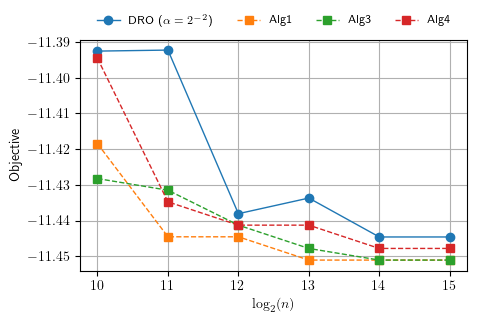

In [63]:
# DRO + bagging in matching
with open ("./DRO_comparison/obj_lists_bagging_matching.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
bagging_alg1_DRO_obj_avg = obj_lists["bagging_alg1_DRO_obj_avg"]
bagging_alg3_DRO_obj_avg = obj_lists["bagging_alg3_DRO_obj_avg"]
bagging_alg4_DRO_obj_avg = obj_lists["bagging_alg4_DRO_obj_avg"]

sample_number = [2**i for i in range(10, 16)]

_, ax = plt.subplots(figsize = (5, 3))
curve_dro = [-item for item in dro_wasserstein_obj_avg]
ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '-', linewidth = 1, label='DRO ($\\alpha = 2^{-2}$)')

curve_alg1 = [-item for item in bagging_alg1_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')

curve_alg3 = [-item for item in bagging_alg3_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')

curve_alg4 = [-item for item in bagging_alg4_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_bagging_matching.png", bbox_inches = "tight")
plt.show()

# Probability plots

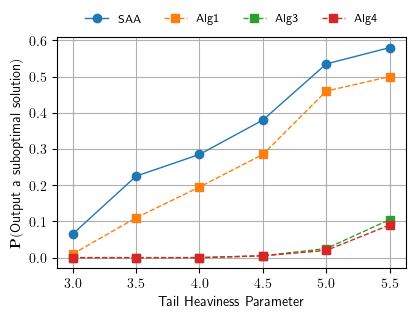

In [141]:
# influence of tail heaviness on the algorithm performance
with open("./prob_plots/LP_tail_influence.json", "r") as f:
    prob_lists = json.load(f)
# print(prob_lists.keys())
SAA_prob_list = prob_lists["SAA_prob_list"]
bagging_alg1_prob_list = prob_lists["bagging_alg1_prob_list"][0]
bagging_alg3_prob_list = prob_lists["bagging_alg3_prob_list"][0]
bagging_alg4_prob_list = prob_lists["bagging_alg4_prob_list"][0]

# SAA_prob_list = [-np.log(1-item) for item in prob_lists["SAA_prob_list"][:-1]]
# bagging_alg1_prob_list = [-np.log(1-item) for item in prob_lists["bagging_alg1_prob_list"][0][:-1]]
# bagging_alg3_prob_list = [-np.log(1-item) for item in prob_lists["bagging_alg3_prob_list"][0][:-1]]
# bagging_alg4_prob_list = [-np.log(1-item) for item in prob_lists["bagging_alg4_prob_list"][0][:-1]]

tail_list = [3,3.5,4,4.5,5,5.5]
# n_groups = len(tail_list)
fig, ax = plt.subplots(figsize = (4.5, 3))
# bar_width = 0.2
# opacity = 0.8
# index = np.arange(n_groups)
# bar1 = ax.bar(index, SAA_prob_list, bar_width, alpha=opacity, label='SAA')
# bar2 = ax.bar(index + bar_width, bagging_alg1_prob_list, bar_width, alpha=opacity, label='Alg1')
# bar3 = ax.bar(index + 2 * bar_width, bagging_alg3_prob_list, bar_width, alpha=opacity, label='Alg3')
# bar4 = ax.bar(index + 3 * bar_width, bagging_alg4_prob_list, bar_width, alpha=opacity, label='Alg4')

curve_SAA = [1-item for item in SAA_prob_list]
curve_alg1 = [1-item for item in bagging_alg1_prob_list]
curve_alg3 = [1-item for item in bagging_alg3_prob_list]
curve_alg4 = [1-item for item in bagging_alg4_prob_list]

ax.plot(tail_list, curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')
ax.plot(tail_list, curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1')
ax.plot(tail_list, curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='Alg3')
ax.plot(tail_list, curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='Alg4')

ax.set_xlabel('Tail Heaviness Parameter')
ax.set_ylabel('$\mathbf{P(}$Output a suboptimal solution$\mathbf{)}$')
# ax.set_xticks(index + 1.5 * bar_width)
# ax.set_xticklabels(tail_list)
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./prob_plots/LP_tail_influence.png", bbox_inches = "tight")
plt.show()

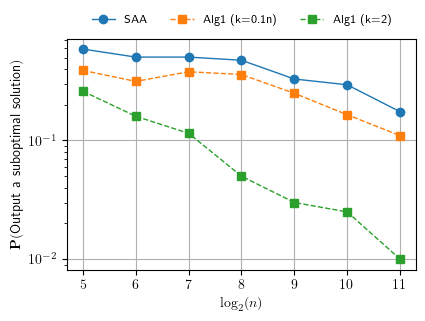

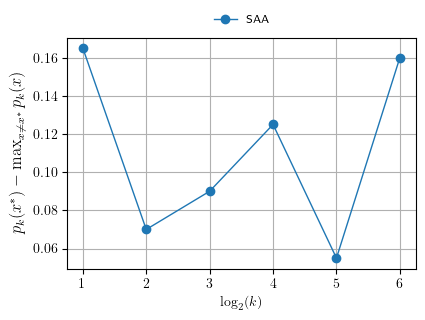

In [133]:
# pk(x) in SSKP instance 1
with open("./prob_plots/SSKP_prob_comparison1.json", "r") as f:
    prob_lists = json.load(f)
# k = 0.1, 2
# print(prob_lists.keys())
SAA_prob_opt_list = prob_lists["SAA_prob_opt_list"]
bagging_prob_opt_list_1 = prob_lists["bagging_prob_opt_list"][0][0]
bagging_prob_opt_list_2 = prob_lists["bagging_prob_opt_list"][0][1]


sample_number = [2**i for i in range(5, 12)]

fig, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [1-item for item in SAA_prob_opt_list]
curve_alg1_1 = [1-item for item in bagging_prob_opt_list_1]
curve_alg1_2 = [1-item for item in bagging_prob_opt_list_2]

ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')
ax.plot(np.log2(sample_number), curve_alg1_1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (k=0.1n)')
ax.plot(np.log2(sample_number), curve_alg1_2, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (k=2)')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('$\mathbf{P(}$Output a suboptimal solution$\mathbf{)}$')
# ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.set_yscale('log')
ax.grid(True)
plt.savefig("./prob_plots/SSKP_prob_suboptimal_1.png", bbox_inches = "tight")
plt.show()


with open("./prob_plots/SSKP_prob_difference1.json", "r") as f:
    prob_lists = json.load(f)

sample_number = [2**i for i in range(1, 7)]
SAA_prob_diff_list = prob_lists["SAA_prob_diff_list"]

fig, ax = plt.subplots(figsize = (4.5, 3))
curve_SAA = [item for item in SAA_prob_diff_list]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

ax.set_xlabel('$\log_2(k)$')
ax.set_ylabel(r'$p_k(x^*) - \max_{x \neq x^*} p_k(x)$', fontsize='large')
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./prob_plots/SSKP_prob_diff_1.png", bbox_inches = "tight")
plt.show()

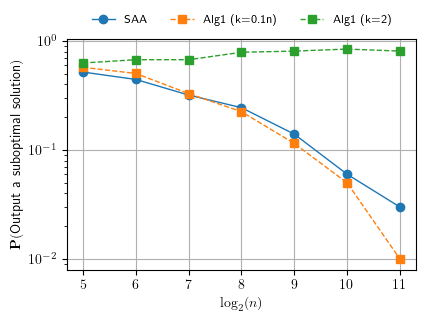

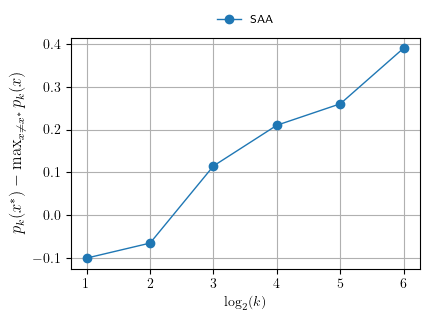

In [134]:
# pk(x) in SSKP instance 2
with open("./prob_plots/SSKP_prob_comparison2.json", "r") as f:
    prob_lists = json.load(f)
# k = 0.1, 2
# print(prob_lists.keys())
SAA_prob_opt_list = prob_lists["SAA_prob_opt_list"]
bagging_prob_opt_list_1 = prob_lists["bagging_prob_opt_list"][0][0]
bagging_prob_opt_list_2 = prob_lists["bagging_prob_opt_list"][0][1]


sample_number = [2**i for i in range(5, 12)]

fig, ax = plt.subplots(figsize = (4.5, 3))

curve_SAA = [1-item for item in SAA_prob_opt_list]
curve_alg1_1 = [1-item for item in bagging_prob_opt_list_1]
curve_alg1_2 = [1-item for item in bagging_prob_opt_list_2]

ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')
ax.plot(np.log2(sample_number), curve_alg1_1, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (k=0.1n)')
ax.plot(np.log2(sample_number), curve_alg1_2, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (k=2)')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('$\mathbf{P(}$Output a suboptimal solution$\mathbf{)}$')
# ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.set_yscale('log')
ax.grid(True)
plt.savefig("./prob_plots/SSKP_prob_suboptimal_2.png", bbox_inches = "tight")
plt.show()


with open("./prob_plots/SSKP_prob_difference2.json", "r") as f:
    prob_lists = json.load(f)

sample_number = [2**i for i in range(1, 7)]
SAA_prob_diff_list = prob_lists["SAA_prob_diff_list"]

fig, ax = plt.subplots(figsize = (4.5, 3))
curve_SAA = [item for item in SAA_prob_diff_list]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

ax.set_xlabel('$\log_2(k)$')
ax.set_ylabel(r'$p_k(x^*) - \max_{x \neq x^*} p_k(x)$', fontsize='large')
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./prob_plots/SSKP_prob_diff_2.png", bbox_inches = "tight")
plt.show()

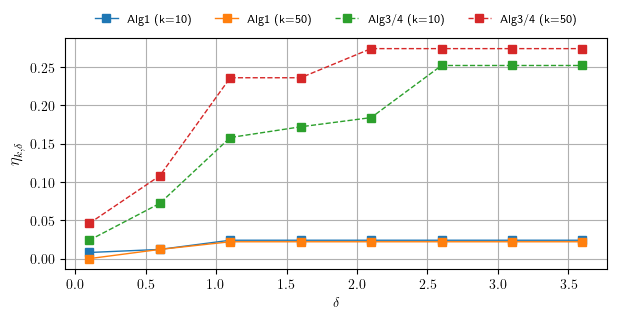

In [51]:
# comparison of eta in LP
# epsilon = 4 when n = 10, epsilon = 2.5 when n = 50
with open("./prob_plots/eta_10.json", "r") as f:
    prob_lists_10 = json.load(f)
with open("./prob_plots/eta_50.json", "r") as f:
    prob_lists_50 = json.load(f)
delta_list = prob_lists_10["delta_list"]
# print(prob_lists_10.keys())
# print(data_lists_10.keys())

SAA_eta_10 = prob_lists_10["SAA_eta"]
Alg34_eta_10 = prob_lists_10["Alg34_eta"]
SAA_eta_50 = prob_lists_50["SAA_eta"]
Alg34_eta_50 = prob_lists_50["Alg34_eta"]

fig, ax = plt.subplots(figsize = (7, 3))

ax.plot(delta_list, SAA_eta_10, marker = 's', linestyle = '-', linewidth = 1, label='Alg1 (k=10)')
ax.plot(delta_list, SAA_eta_50, marker = 's', linestyle = '-', linewidth = 1, label='Alg1 (k=50)')
ax.plot(delta_list, Alg34_eta_10, marker = 's', linestyle = '--', linewidth = 1, label='Alg3/4 (k=10)')
ax.plot(delta_list, Alg34_eta_50, marker = 's', linestyle = '--', linewidth = 1, label='Alg3/4 (k=50)')

ax.set_xlabel('$\delta$')
ax.set_ylabel('$\eta_{k,\delta}$', fontsize = 'large')
ax.legend(fontsize = 'small', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./prob_plots/eta_comparison_LP.png", bbox_inches = "tight")
plt.show()

# Running time of network design problem

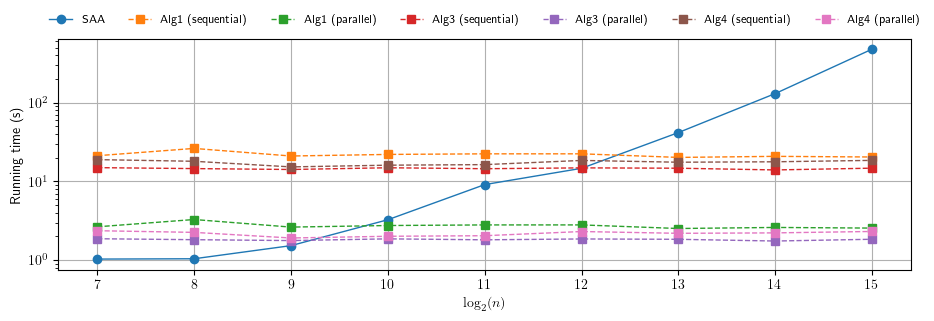

In [160]:
sample_number = [2**i for i in range(7,16)]

SAA_time = [1.0318, 1.0417, 1.5291, 3.2617, 9.1172, 14.6818, 41.8052, 130.8701, 480.0050]
bagging_alg1_time_parallel = [2.6520, 3.2827, 2.6298, 2.7542, 2.8024, 2.8036, 2.5237, 2.6034, 2.5547]
bagging_alg34_time_parallel = [10.1923, 9.6996, 13.7856, 10.3796, 9.5464, 9.7674, 9.7105, 9.5395, 9.8959]
suboptimality_matrix_time = [3.2+3.25,3.03*2, 2.94+3.71+3.59, 3.36+3.29,2.99+2.93, 3.02+3.03, 2.96+3.07,3.13+2.91, 3.12+3.09]
bagging_alg3_time_parallel = []
for i in range(len(sample_number)):
    bagging_alg3_time_parallel.append((bagging_alg34_time_parallel[i] - suboptimality_matrix_time[i])/2)

bagging_alg4_time_parallel = [item+np.random.uniform(0.1,0.5) for item in bagging_alg3_time_parallel]

bagging_alg1_time = [item * 8 for item in bagging_alg1_time_parallel]
bagging_alg3_time = [item * 8 for item in bagging_alg3_time_parallel]
bagging_alg4_time = [item * 8 for item in bagging_alg4_time_parallel]

fig, ax = plt.subplots(figsize = (11, 3))
ax.plot(np.log2(sample_number), SAA_time, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')
ax.plot(np.log2(sample_number), bagging_alg1_time, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (sequential)')
ax.plot(np.log2(sample_number), bagging_alg1_time_parallel, marker = 's', linestyle = '--', linewidth = 1, label='Alg1 (parallel)')
ax.plot(np.log2(sample_number), bagging_alg3_time, marker = 's', linestyle = '--', linewidth = 1, label='Alg3 (sequential)')
ax.plot(np.log2(sample_number), bagging_alg3_time_parallel, marker = 's', linestyle = '--', linewidth = 1, label='Alg3 (parallel)')
ax.plot(np.log2(sample_number), bagging_alg4_time, marker = 's', linestyle = '--', linewidth = 1, label='Alg4 (sequential)')
ax.plot(np.log2(sample_number), bagging_alg4_time_parallel, marker = 's', linestyle = '--', linewidth = 1, label='Alg4 (parallel)')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Running time (s)')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=7, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
ax.set_yscale('log')
plt.savefig("./running_time_network.png", bbox_inches = "tight")
plt.show()